# Tennis match prediction -- Data cleaning and wrangling

## Goal
1. Download data from [data hub](https://datahub.io/sports-data/atp-world-tour-tennis-data#data-cli)
2. Perform data cleaning and wrangling
    * extract useful information from each table
    * cleaning redundant rows that are not useful 
3. Prepare training and testing set for future modeling:
    * Traditional machine learning(Logistic regression, KNN, Decision tree...etc.)
    * Deep learning

### Importing useful packages

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# set the dataframe displaying format
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# supress warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_style("whitegrid")

In this notebook, we will use the web scrapped data online from year 1991 to 2017, there are multiple csv files and one of the goals here is to clean and merge those data for future analysis and modeling

### Loading data

In [14]:
scores_1991_2016_raw = pd.read_csv('../Data/scores_1991_2016.csv')
scores_2017_raw = pd.read_csv('../Data/scores_2017.csv')
stats_1991_2016_raw = pd.read_csv('../Data/stats_1991_2016.csv')
stats_2017_raw = pd.read_csv('../Data/stats_2017.csv')
tournament = pd.read_csv('../Data/tournament.csv')
rank = pd.read_csv('../Data/ranking.csv')

In [15]:
# check the size of each raw data
print(scores_1991_2016_raw.shape)
print(scores_2017_raw.shape)
print(stats_1991_2016_raw.shape)
print(stats_2017_raw.shape)

(95359, 24)
(3830, 24)
(91956, 53)
(3811, 53)


We can see that the size of our data varies quite a bit, this is due to the year span from 1991 to 2016(total 26 years) as opposed to 2017 has its own, the stats data has all the detail match statistics and the score data more focus on the information of the match, we will first try to merge 1991-2016 and 2017 together since the column number is the same, before doing so, let's double check if all the columns match with each other

In [16]:
# check if the column name and order matches
print((scores_1991_2016_raw.columns != scores_2017_raw.columns).sum())
print((stats_1991_2016_raw.columns != stats_2017_raw.columns).sum())

0
0


Since they both equals zero, which implies the columns are exactly the same

In [17]:
# merging data
scores_raw = pd.concat([scores_1991_2016_raw, scores_2017_raw], axis=0)
stats_raw = pd.concat([stats_1991_2016_raw, stats_2017_raw], axis=0)

We will check the columns of score first

In [18]:
display(scores_raw.head())
print(scores_raw.columns)

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Finals,1,1,Nicklas Kulti,k181,nicklas-kulti,Michael Stich,s351,michael-stich,NaN,6,63 16 62,2,1,13,11,0,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats
1,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,1,Michael Stich,s351,michael-stich,Jim Courier,c243,jim-courier,6,2,64 76(6),2,0,13,10,1,0,1991-7308-s351-c243,/en/scores/1991/7308/MS003/match-stats
2,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,2,Nicklas Kulti,k181,nicklas-kulti,Magnus Larsson,l206,magnus-larsson,NaN,NaN,75 64,2,0,13,9,0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats
3,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,1,Jim Courier,c243,jim-courier,Martin Sinner,s367,martin-sinner,2,Q,76(3) 63,2,0,13,9,1,0,1991-7308-c243-s367,/en/scores/1991/7308/MS007/match-stats
4,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Quarter-Finals,3,2,Michael Stich,s351,michael-stich,Jimmy Arias,a031,jimmy-arias,6,NaN,36 63 63,2,1,15,12,0,0,1991-7308-s351-a031,/en/scores/1991/7308/MS006/match-stats


Index(['tourney_year_id', 'tourney_order', 'tourney_slug', 'tourney_url_suffix', 'tourney_round_name', 'round_order', 'match_order', 'winner_name', 'winner_player_id', 'winner_slug', 'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed', 'loser_seed', 'match_score_tiebreaks', 'winner_sets_won', 'loser_sets_won', 'winner_games_won', 'loser_games_won', 'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id', 'match_stats_url_suffix'], dtype='object')


Next we will drop some unecessary columns that will not provide any help for our prediction model, let us show the number of unique values in each column

In [19]:
# show the number of unique values
display(scores_raw.nunique())

tourney_year_id            1949
tourney_order                92
tourney_slug                127
tourney_url_suffix         1949
tourney_round_name           12
round_order                  10
match_order                  64
winner_name                2071
winner_player_id           2065
winner_slug                2066
loser_name                 3553
loser_player_id            3548
loser_slug                 3546
winner_seed                  67
loser_seed                   68
match_score_tiebreaks     12083
winner_sets_won               5
loser_sets_won                4
winner_games_won             36
loser_games_won              34
winner_tiebreaks_won          4
loser_tiebreaks_won           3
match_id                  99175
match_stats_url_suffix    95620
dtype: int64

Based on the unique value observation and domain knowledge, we will first drop the following columns:
 * `tourney_slug`: tournament name, not useful
 * `tourney_url_suffix`: url, not useful
 * `winner_slug`: similar to `winner_player_id`, no need to keep
 * `loser_slug`: same reason as above
 * `match_stats_url_suffix`: url, not useful

In [20]:
col_drop = ['tourney_slug', 'tourney_url_suffix', 'winner_slug', 'loser_slug', 
            'match_stats_url_suffix']
scores_raw.drop(col_drop, axis=1, inplace=True)

Next we will check the data type and number of missing values in each column

In [21]:
scores_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99189 entries, 0 to 3829
Data columns (total 19 columns):
tourney_year_id          99189 non-null object
tourney_order            99189 non-null int64
tourney_round_name       99189 non-null object
round_order              99189 non-null int64
match_order              99189 non-null int64
winner_name              99189 non-null object
winner_player_id         99189 non-null object
loser_name               99189 non-null object
loser_player_id          99189 non-null object
winner_seed              57373 non-null object
loser_seed               45231 non-null object
match_score_tiebreaks    99187 non-null object
winner_sets_won          99189 non-null int64
loser_sets_won           99189 non-null int64
winner_games_won         99189 non-null int64
loser_games_won          99189 non-null int64
winner_tiebreaks_won     99189 non-null int64
loser_tiebreaks_won      99189 non-null int64
match_id                 99189 non-null object
dtypes: 

In [22]:
# show number of missing value in each column
scores_raw.isnull().sum()

tourney_year_id              0
tourney_order                0
tourney_round_name           0
round_order                  0
match_order                  0
winner_name                  0
winner_player_id             0
loser_name                   0
loser_player_id              0
winner_seed              41816
loser_seed               53958
match_score_tiebreaks        2
winner_sets_won              0
loser_sets_won               0
winner_games_won             0
loser_games_won              0
winner_tiebreaks_won         0
loser_tiebreaks_won          0
match_id                     0
dtype: int64

### Dealing with missing value

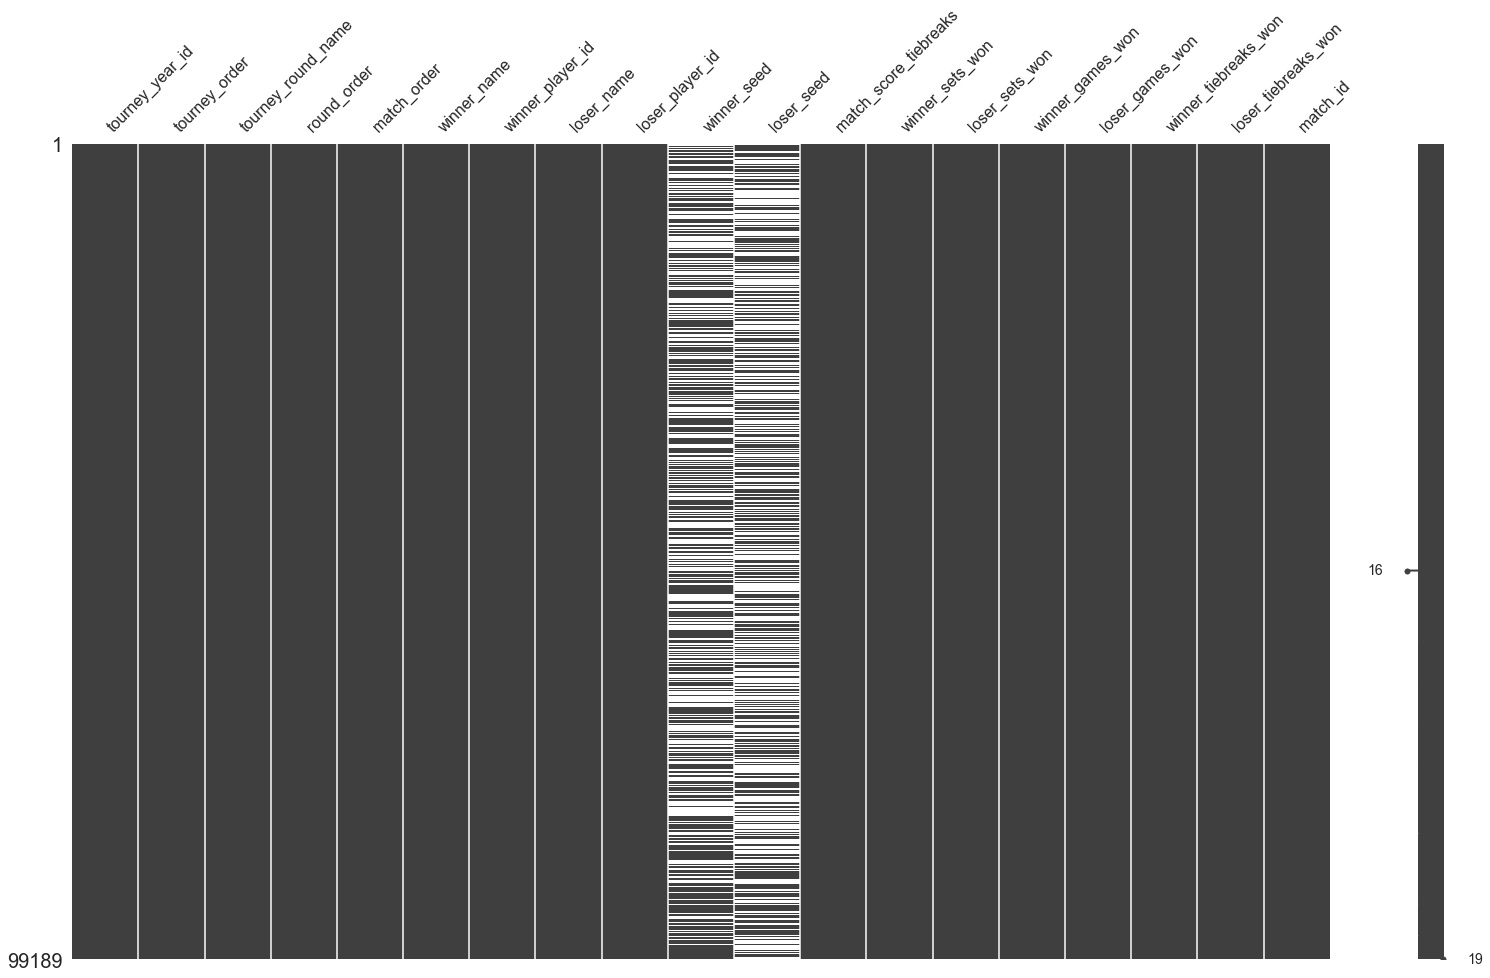

In [23]:
# show the distribution of missing values
import missingno as msno

msno.matrix(scores_raw, figsize=(25,15))
plt.show()

Since the data is listed in chronical order, the missing value only appears in `winner_seed` and `loser_seed` columns(2 in `match_score_tiebreaks` column), it seems randomly distributed, and in fact, the missing value could be easily explained: in each tournament, there are always seed players and un-seeded player, the seed number basically reflects the world ranking compare to other players in the same tournament, the higher the ranking, the lower the seed number, this is to make sure seed players will not encounter in early rounds since this will highly affect the ticket sales and how tense the match will be played. After all, we do not want to see the top 2 player in the world play against each other in first round, we are much willing to see them in the final. The number of seeds are always less than the nubmer of players in the tournament, it is usually 8, 16, or 32, depends on the scale of the tournament. Thus there will left most of the players in the tournament unseeded, thus having missing values in the seed column. 

### Rank vs seed
As we described above, the number of seed basically reflects players ranking at that time, since most of the players are unseeded players in a certain tournament and it is difficult to infer a player's ranking from this data since the only information we get is the player's rank is not high enough to get seeded, we could drop the row with missing values, but this will lost most of our examples. Another thing we could do is to dig out both players ranking in a certain match at that week, this will not only provide more accurate information than the seed number, but could also potentially improve our future model prediction.

The `scores_raw` data does not provide information of player's ranking at the moment, we need other two data `tournament` and `rank` to dig out the ranking information, since those three are relational tables, they share some identical features that could help us find the information we are looking for, before doing so, let us drop the seed columns since it will be redundant if we have the ranking information.

In [24]:
# drop winner_seed and loser_seed columns
scores_raw.drop(['winner_seed', 'loser_seed'], axis=1, inplace=True)

In [25]:
# keep only the rank and tournament since 1990
tour_since_1990 = tournament[tournament['tourney_year'] > 1989]
rank_since_1990 = rank[rank['week_year'] > 1989]

In [26]:
tour_since_1990.head()

,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id,tourney_year_id
2060,1990,1,Adelaide,7308.0,adelaide,Adelaide,1990.01.01,1.0,1.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/adelaide/7308/1990/results,Thomas Muster,/en/players/thomas-muster/m099/overview,thomas-muster,m099,Andrew Castle,/en/players/andrew-castle/c246/overview,andrew-castle,c246,Nduka Odizor,/en/players/nduka-odizor/o006/overview,nduka-odizor,o006,1990-7308
2061,1990,2,Wellington,354.0,wellington,Wellington,1990.01.01,1.0,1.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/wellington/354/1990/results,Emilio Sanchez,/en/players/emilio-sanchez/s014/overview,emilio-sanchez,s014,Kelly Evernden,/en/players/kelly-evernden/e025/overview,kelly-evernden,e025,Nicolas Pereira,/en/players/nicolas-pereira/p218/overview,nicolas-pereira,p218,1990-354
2062,1990,3,Auckland,301.0,auckland,Auckland,1990.01.08,1.0,8.0,32,32,Outdoor,Hard,"$150,000",/en/scores/archive/auckland/301/1990/results,Scott Davis,/en/players/scott-davis/d004/overview,scott-davis,d004,Kelly Jones,/en/players/kelly-jones/j018/overview,kelly-jones,j018,Robert Van't Hof,/en/players/robert-vant-hof/v008/overview,robert-vant-hof,v008,1990-301
2063,1990,4,Sydney Outdoor,338.0,sydney,Sydney,1990.01.08,1.0,8.0,32,32,Outdoor,Hard,"$175,000",/en/scores/archive/sydney/338/1990/results,Yannick Noah,/en/players/yannick-noah/n022/overview,yannick-noah,n022,Pat Cash,/en/players/pat-cash/c023/overview,pat-cash,c023,Mark Kratzmann,/en/players/mark-kratzmann/k021/overview,mark-kratzmann,k021,1990-338
2064,1990,5,Australian Open,580.0,australian-open,Melbourne,1990.01.15,1.0,15.0,128,128,Outdoor,Hard,"$1,462,000",/en/scores/archive/australian-open/580/1990/re...,Ivan Lendl,/en/players/ivan-lendl/l018/overview,ivan-lendl,l018,Pieter Aldrich,/en/players/pieter-aldrich/a066/overview,pieter-aldrich,a066,Danie Visser,/en/players/danie-visser/v032/overview,danie-visser,v032,1990-580


We can see from the above table that `tour_since_1990` and `scores_raw` share a column name `tourney_year_id`, this could provide us the time information and further search for the ranking of both players in that match. We will first convert date column from both `tour_since_1990` and `rank_since_1990` using pd.to_datetime for furture use.

In [27]:
tour_since_1990['tourney_dates'] = pd.to_datetime(tour_since_1990['tourney_dates'])
rank_since_1990['week_title'] = pd.to_datetime(rank_since_1990['week_title'])

In [28]:
# define helper function to find winner rank in a certain match
def winner(row, feature='rank_number'):
    
    # extract features from example
    tour_id = row['tourney_year_id']
    winner_id = row['winner_player_id']
    tour_date = tour_since_1990[tour_since_1990['tourney_year_id'] == tour_id] \
                .reset_index(drop=True).loc[0, 'tourney_dates'] # more robust representation
    
    
    # set a 7 days and 0 day timedelta for filtering purpose
    seven_d = pd.Timedelta(days=7)
    zero_d = pd.Timedelta(days=0)
    
    # filter particular player rank
    rank_winner = rank_since_1990[(rank_since_1990['player_id'] == winner_id)]
    
    # set condition to narrow down the correct ranking at the time
    condition1 = ((rank_winner['week_title'] - tour_date) < seven_d) 
    condition2 = ((rank_winner['week_title'] - tour_date) >= zero_d)
    
    # in case it could not find the ranking
    try:
        rank = rank_winner[condition1 & condition2].reset_index(drop=True).loc[0, feature]
    
        return rank
    
    except KeyError:
        
        return None
    
# define helper function to find loser rank in a certain match
def loser(row, feature='rank_number'):
    
    # extract features from example
    tour_id = row['tourney_year_id']
    loser_id = row['loser_player_id']
    tour_date = tour_since_1990[tour_since_1990['tourney_year_id'] == tour_id] \
                .reset_index(drop=True).loc[0, 'tourney_dates'] # more robust representation
    
    
    # set a 7 days and 0 day timedelta for filtering purpose
    seven_d = pd.Timedelta(days=7)
    zero_d = pd.Timedelta(days=0)
    
    # filter particular player rank
    rank_loser = rank_since_1990[rank_since_1990['player_id'] == loser_id]

    # set condition to narrow down the correct ranking at the time
    condition1 = ((rank_loser['week_title'] - tour_date) < seven_d) 
    condition2 = ((rank_loser['week_title'] - tour_date) >= zero_d)
    
    # in case it could not find the ranking
    try:
        rank = rank_loser[condition1 & condition2].reset_index(drop=True).loc[0, feature]
    
        return rank
    
    except KeyError:
        
        return None

The code below will take few hours to extract the ranking information of every match example, we have pre-ran the function showing above and save the result in another table `scores_raw`, will keep the same name here. We will also comment the code, uncomment it when necessary.

In [192]:
# apply helper function to create winner_ranking and loser_ranking at the moment of the match
#scores_raw['winner_ranking'] = scores_raw.apply(winner, axis=1)
#scores_raw['loser_ranking'] = scores_raw.apply(loser, axis=1)
#scores_raw.to_csv('../Data/scores_processed', index=False)
#scores_raw['winner_ranking_points'] = scores_raw.apply(winner, args=('ranking_points',), axis=1)
#scores_raw['loser_ranking_points'] = scores_raw.apply(loser, args=('ranking_points',), axis=1)
#scores_raw.to_csv('../Data/scores_processed', index=False)

In [29]:
# re-load the processed data that incorporates ranking information
scores_raw = pd.read_csv('../Data/scores_processed.csv')

After we attach the ranking information of both winner and loser of that match, let us move the focus to `stats_raw` data

In [30]:
# show a few examples of stats_raw
display(stats_raw.head())

,tourney_order,match_id,match_stats_url_suffix,match_time,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats,01:20:00,80.0,3.0,0.0,0.0,65.0,29.0,46.0,12.0,19.0,0.0,2.0,41.0,65.0,12.0,36.0,20.0,33.0,4.0,7.0,11.0,11.0,32.0,69.0,73.0,134.0,1.0,0.0,36.0,69.0,24.0,36.0,13.0,33.0,3.0,7.0,37.0,69.0,17.0,46.0,7.0,19.0,2.0,2.0,11.0,11.0,24.0,65.0,61.0,134.0
1,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats,01:29:00,89.0,1.0,2.0,44.0,65.0,31.0,44.0,12.0,21.0,2.0,5.0,43.0,65.0,16.0,47.0,21.0,36.0,4.0,7.0,12.0,12.0,37.0,83.0,80.0,148.0,12.0,5.0,47.0,83.0,31.0,47.0,15.0,36.0,3.0,7.0,46.0,83.0,13.0,44.0,9.0,21.0,3.0,5.0,12.0,12.0,22.0,65.0,68.0,148.0
2,0,1991-7308-k181-s424,/en/scores/1991/7308/MS005/match-stats,00:55:00,55.0,0.0,1.0,17.0,36.0,11.0,17.0,13.0,19.0,1.0,3.0,24.0,36.0,15.0,29.0,19.0,25.0,7.0,10.0,7.0,8.0,34.0,54.0,58.0,90.0,2.0,2.0,29.0,54.0,14.0,29.0,6.0,25.0,3.0,10.0,20.0,54.0,6.0,17.0,6.0,19.0,2.0,3.0,8.0,7.0,12.0,36.0,32.0,90.0
3,0,1991-7308-a031-s331,/en/scores/1991/7308/MS013/match-stats,01:09:00,69.0,2.0,3.0,44.0,58.0,28.0,44.0,7.0,14.0,6.0,8.0,35.0,58.0,7.0,24.0,20.0,32.0,5.0,9.0,9.0,9.0,27.0,56.0,62.0,114.0,3.0,4.0,24.0,56.0,17.0,24.0,12.0,32.0,4.0,9.0,29.0,56.0,16.0,44.0,7.0,14.0,2.0,8.0,9.0,9.0,23.0,58.0,52.0,114.0
4,0,1991-7308-k030-w136,/en/scores/1991/7308/MS009/match-stats,01:29:00,89.0,6.0,3.0,37.0,71.0,25.0,37.0,19.0,34.0,1.0,3.0,44.0,71.0,16.0,36.0,16.0,28.0,5.0,10.0,10.0,10.0,32.0,64.0,76.0,135.0,4.0,2.0,36.0,64.0,20.0,36.0,12.0,28.0,5.0,10.0,32.0,64.0,12.0,37.0,15.0,34.0,2.0,3.0,10.0,10.0,27.0,71.0,59.0,135.0


In [31]:
# check the data type of each column
stats_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95767 entries, 0 to 3810
Data columns (total 53 columns):
tourney_order                       95767 non-null int64
match_id                            95767 non-null object
match_stats_url_suffix              95767 non-null object
match_time                          95617 non-null object
match_duration                      95617 non-null float64
winner_aces                         95617 non-null float64
winner_double_faults                95617 non-null float64
winner_first_serves_in              95617 non-null float64
winner_first_serves_total           95617 non-null float64
winner_first_serve_points_won       95617 non-null float64
winner_first_serve_points_total     95617 non-null float64
winner_second_serve_points_won      95617 non-null float64
winner_second_serve_points_total    95617 non-null float64
winner_break_points_saved           95617 non-null float64
winner_break_points_serve_total     95617 non-null float64
winner_servi

It looks like we have most of the columns with numerical values, this is no surprise since this is the stats for each match and most of the variables can be quantified, we will check the missing values next.

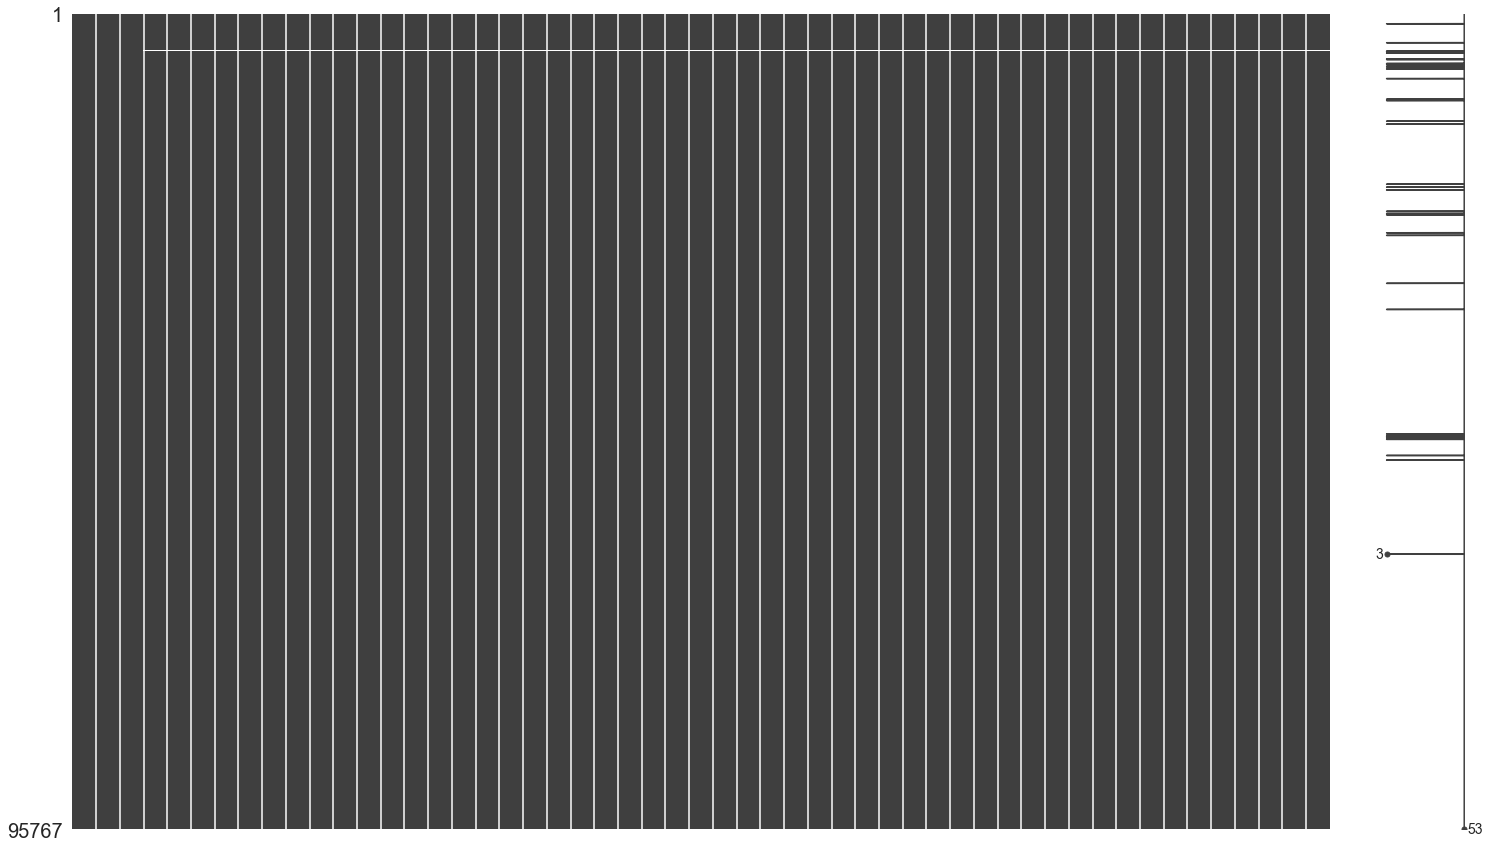

In [32]:
# check the distribution of missing values
msno.matrix(stats_raw, figsize=(25,15))
plt.show()

We can see that the location of missing values seems to align pretty well from column to column, this suggest that there are some examples that have most of the values missing, in this case, we could savely drop those examples since they almost did not provide any useful information.

In [33]:
# drop the rows with missing values
stats_raw.dropna(inplace=True)

Since most of the features will be useful for prediction model, we will only drop `match_stats_url_suffix` and `match_time`, the later is the same as the `match_duration` column.

In [34]:
stats_raw.drop(['match_stats_url_suffix', 'match_time'], axis=1, inplace=True)

### Dealing with outliers
Outliers could be harmful for our model prediction especially when a model try to incorporate the outliers into decision boundary by drastically changing the parameters, instead of plotting each variables distribution and examine one by one, we will use the domain knowledge to judge whether a specific example is out of normal specs, for example, even with grand slam matches, it rarely happened a siggle match will be more than five hours, historically there were only few examples, in this part we will basically drop the outlier examples since we have plenty of data to train our model by only sacrificing a little portion of it.

In [35]:
# re-examine the columns of scores_raw and stats_raw
display(scores_raw.head(3))
display(stats_raw.head(3))

,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points
0,1991-7308,1,Finals,1,1,Nicklas Kulti,k181,Michael Stich,s351,63 16 62,2,1,13,11,0,0,1991-7308-k181-s351,51.0,42.0,0.0,0.0
1,1991-7308,1,Semi-Finals,2,1,Michael Stich,s351,Jim Courier,c243,64 76(6),2,0,13,10,1,0,1991-7308-s351-c243,42.0,25.0,0.0,0.0
2,1991-7308,1,Semi-Finals,2,2,Nicklas Kulti,k181,Magnus Larsson,l206,75 64,2,0,13,9,0,0,1991-7308-k181-l206,51.0,56.0,0.0,0.0


,tourney_order,match_id,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
0,0,1991-7308-k181-l206,80.0,3.0,0.0,0.0,65.0,29.0,46.0,12.0,19.0,0.0,2.0,41.0,65.0,12.0,36.0,20.0,33.0,4.0,7.0,11.0,11.0,32.0,69.0,73.0,134.0,1.0,0.0,36.0,69.0,24.0,36.0,13.0,33.0,3.0,7.0,37.0,69.0,17.0,46.0,7.0,19.0,2.0,2.0,11.0,11.0,24.0,65.0,61.0,134.0
1,0,1991-7308-k181-s351,89.0,1.0,2.0,44.0,65.0,31.0,44.0,12.0,21.0,2.0,5.0,43.0,65.0,16.0,47.0,21.0,36.0,4.0,7.0,12.0,12.0,37.0,83.0,80.0,148.0,12.0,5.0,47.0,83.0,31.0,47.0,15.0,36.0,3.0,7.0,46.0,83.0,13.0,44.0,9.0,21.0,3.0,5.0,12.0,12.0,22.0,65.0,68.0,148.0
2,0,1991-7308-k181-s424,55.0,0.0,1.0,17.0,36.0,11.0,17.0,13.0,19.0,1.0,3.0,24.0,36.0,15.0,29.0,19.0,25.0,7.0,10.0,7.0,8.0,34.0,54.0,58.0,90.0,2.0,2.0,29.0,54.0,14.0,29.0,6.0,25.0,3.0,10.0,20.0,54.0,6.0,17.0,6.0,19.0,2.0,3.0,8.0,7.0,12.0,36.0,32.0,90.0


##### match duration
As the example we mentioned, we will drop the rows that exceed 5 hours of match time for the upper boundary, we will also drop the match that is less than 30 minutes, since this was more likely to happen that one of the players was injured and retired from the match.

In [36]:
# keep on the rows that has match duration more than 30 and less or eqaul to 300
stats_raw = stats_raw[(stats_raw['match_duration'] <= 300) & (stats_raw['match_duration'] > 30)]

Before moving further, we check the relationship between match duration and other variables, since all the match stats are likely to be highly correlated with match duration, for example, if the match gets longer and longer, the total points they play in the match will definitely be larger and the total aces two players served will also be higher.

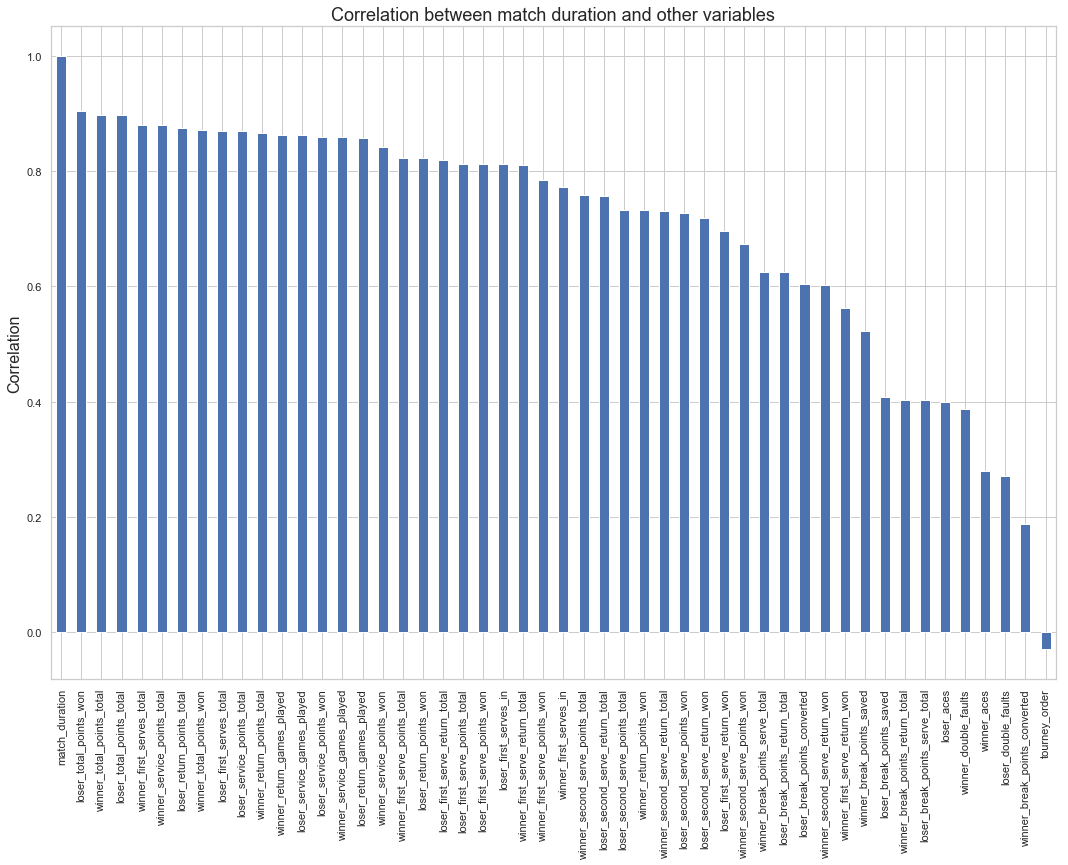

In [37]:
fig, ax = plt.subplots(1,1,figsize=(18,12))
stats_raw.select_dtypes(['number']).corr()['match_duration'].sort_values(ascending=False).plot(kind='bar', color='b')
ax.set_title('Correlation between match duration and other variables', size=18)
ax.set_ylabel('Correlation', size=16)
plt.show()

We can see from above that most of the variables have correlation coefficient with match duration higher than 0.6, this suggest that when eliminating outliers from match duration, it is likely to eliminate the outliers of that variable as well, we will focus on variables that have correlation coefficient lower than 0.5 and apply our domain knowledge to eliminate rare events.

##### winner_break_points_return_total
This is the stat that count of how many break points does the match winner return, the large number only occurs under two conditions:
    1. The winner needs to force the loser for many break points.
    2. The winner has to miss many break point chances
A number of more than 20 are pretty rare.

In [38]:
# check the counts
stats_raw['winner_break_points_return_total'].value_counts(ascending=True)

46.0        1
34.0        2
33.0        2
32.0        3
30.0       10
31.0       12
28.0       15
29.0       24
27.0       32
26.0       44
25.0       61
24.0       89
23.0      147
22.0      209
21.0      249
20.0      409
19.0      530
1.0       585
18.0      823
0.0      1020
17.0     1111
16.0     1612
2.0      1688
15.0     2108
14.0     2888
3.0      3587
13.0     3925
12.0     5074
4.0      5829
11.0     6230
10.0     7904
5.0      8072
9.0      9017
6.0      9843
8.0     10070
7.0     10508
Name: winner_break_points_return_total, dtype: int64

In [39]:
# eliminate the rows that have winner_break_points_return_total more than 20
stats_raw = stats_raw[stats_raw['winner_break_points_return_total'] <= 20]

##### loser_break_points_serve_total
This is pretty much the same stat as winner_break_points_serve_total, simply just from the loser perspective, thus we do not need further treatment.

##### loser_break_points_saved
This stats indicate how many break points have the loser saved, this is unlikely to be large, since if loser saved most of the break points, then he probably would not have lost the match.

In [40]:
stats_raw['loser_break_points_saved'].value_counts(ascending=True)

-7.0         1
-6.0         1
-10.0        1
 19.0        2
 18.0        2
 17.0       21
 16.0       47
 15.0      161
 14.0      375
 13.0      681
 12.0     1129
 11.0     1725
 10.0     2563
 9.0      3785
 8.0      4975
 0.0      5377
 7.0      6846
 1.0      8550
 6.0      8730
 5.0     10908
 2.0     11553
 4.0     12436
 3.0     12964
Name: loser_break_points_saved, dtype: int64

From above we can see that we even have negative number that does not make sense at all, we will also drop the rows that loser save equal or more than 12 break points.

In [41]:
stats_raw = stats_raw[(stats_raw['loser_break_points_saved'] < 12) & (stats_raw['loser_break_points_saved'] >= 0)]

##### loser aces
This stat is pretty straightforward by its name, it is unlikely to be too high either, otherwise the loser may not have lost.

In [42]:
stats_raw['loser_aces'].value_counts(ascending=True)

49.0        1
40.0        1
41.0        1
52.0        1
56.0        1
55.0        1
48.0        1
46.0        2
42.0        2
45.0        2
51.0        2
36.0        3
43.0        3
44.0        3
37.0        4
38.0        5
39.0        6
34.0       10
33.0       11
35.0       12
31.0       19
32.0       20
29.0       25
30.0       26
28.0       31
27.0       42
26.0       57
25.0       76
24.0       81
23.0      118
22.0      120
20.0      172
21.0      181
19.0      252
18.0      313
17.0      409
16.0      476
15.0      659
14.0      781
13.0     1002
12.0     1307
11.0     1609
10.0     2060
9.0      2769
8.0      3568
7.0      4590
6.0      5772
5.0      7520
4.0      9229
0.0     10575
3.0     10919
2.0     12777
1.0     12785
Name: loser_aces, dtype: int64

In [43]:
# elimiate rows that have loser aces more than 15
stats_raw = stats_raw[stats_raw['loser_aces'] <= 15]

##### winner_double_faults
This is again a straightforward stat, the number of it is likely to high either, otherwise the winner might not have won the match.

In [44]:
stats_raw['winner_double_faults'].value_counts(ascending=True)

23.0        2
21.0        2
20.0        3
18.0        5
19.0        6
17.0       10
16.0       20
15.0       38
14.0       53
13.0       93
12.0      175
11.0      247
10.0      467
9.0       792
8.0      1190
7.0      2201
6.0      3599
5.0      5771
4.0      9157
0.0     13525
3.0     13573
2.0     17832
1.0     19161
Name: winner_double_faults, dtype: int64

In [45]:
# elimiate the rows that has winner_double_fault more or equal to 10
stats_raw = stats_raw[stats_raw['winner_double_faults'] <= 9]

##### winner_aces
Another straightforward stat, we will get rid of rarely happen events that the winner have extremely high number aces.

In [46]:
stats_raw['winner_aces'].value_counts(ascending=True)

51.0       1
47.0       1
43.0       1
48.0       1
45.0       1
44.0       2
41.0       2
42.0       3
39.0       4
37.0       5
40.0       5
36.0       6
38.0       9
35.0      11
34.0      15
32.0      18
33.0      18
31.0      22
30.0      32
28.0      37
29.0      49
26.0      79
27.0      81
25.0      91
24.0     130
23.0     145
22.0     180
21.0     279
20.0     329
19.0     419
18.0     509
17.0     643
16.0     790
15.0     988
14.0    1351
13.0    1605
12.0    2104
11.0    2710
10.0    3230
9.0     4009
8.0     4902
0.0     5324
7.0     5904
6.0     6982
1.0     7757
5.0     8262
4.0     8964
2.0     9221
3.0     9570
Name: winner_aces, dtype: int64

In [47]:
# pick 25 as the threshold
stats_raw = stats_raw[stats_raw['winner_aces'] <= 25]

##### loser_double_faults
This stat could be high or low since this has relatively lower correlation between the outcome of the match. We will take a look of the distribution.

In [48]:
stats_raw['loser_double_faults'].value_counts(ascending=True)

21.0        2
22.0        3
20.0        7
19.0       10
18.0       11
17.0       20
16.0       27
15.0       56
14.0       87
13.0      143
12.0      226
11.0      440
10.0      726
9.0      1325
8.0      2027
7.0      3390
6.0      5542
0.0      7538
5.0      8340
4.0     11664
1.0     13531
3.0     15054
2.0     16229
Name: loser_double_faults, dtype: int64

In [49]:
# pick 10 as the threshold
stats_raw = stats_raw[stats_raw['loser_double_faults'] <= 10]

##### winner_break_points_converted
This stat is usually a good indicator as a outcome predictor, unless every set played went to tie break, otherwise winner should have at least a couple of break points converted. Let us check the distribution.

In [50]:
stats_raw['winner_break_points_converted'].value_counts(ascending=True)

13.0        1
12.0        2
11.0       15
10.0      102
9.0       323
8.0      1006
0.0      1284
7.0      2694
1.0      3364
6.0      7203
2.0     11314
5.0     15600
3.0     20088
4.0     22370
Name: winner_break_points_converted, dtype: int64

In [51]:
# it is still pretty rare to break the opponents more than 8 times, we will eliminate those rows
stats_raw = stats_raw[stats_raw['winner_break_points_converted'] <= 8]

##### tourney_order
This is not the stat of the match itself but the order of tournament of a single year, we will not do anything on this column.

Before moving on, we will double check all the numerical variables are positive numbers since all the stats are supposed to be zero or larger.

In [52]:
# eliminate any negative rows
for col in stats_raw.select_dtypes(['number']).columns:
    stats_raw = stats_raw[stats_raw[col] >= 0]

We have cleaned up many rows that were determined rare events from our domain knowledge, next we will start to come up with some ways to build out training examples.

### Prepare training and testing set

Our next step is to extract the information from `scores_raw` and find the matching stats in `stats_raw` and put them together to make features as well as label it for supervised learning. The following is the flow chart that better illustrate the process:

Since the `scores_raw` is already in chronical order, we will add the index column to help trace back the history if necessary 

In [53]:
scores_raw['index'] = list(range(1, len(scores_raw)+1))
scores_raw = scores_raw[['index'] + list(scores_raw.columns[:-1])].copy()
scores_raw.set_index(['match_id'], inplace=True)
stats_raw.set_index(['match_id'], inplace=True)

#### Active players vs none-active players
Professional tennis is a highly competitive world, if you do not train well and were not born with full of talents, there is a high chance to fail in the career, our next goal is to find out relatively inactive players and eliminate those rows, for example, if a certain player only play less than 20 matches in his whole ATP career, it is unlikely to provide much help in our predicting model. We have `scores_raw` that provides all the information of every match since 1991 to 2017, we will use it to get rid of some rows that those inactive player participate in.

In [54]:
# take another look of the scores_raw
scores_raw.head()

,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points
match_id,,,,,,,,,,,,,,,,,,,,,
1991-7308-k181-s351,1,1991-7308,1,Finals,1,1,Nicklas Kulti,k181,Michael Stich,s351,63 16 62,2,1,13,11,0,0,51.0,42.0,0.0,0.0
1991-7308-s351-c243,2,1991-7308,1,Semi-Finals,2,1,Michael Stich,s351,Jim Courier,c243,64 76(6),2,0,13,10,1,0,42.0,25.0,0.0,0.0
1991-7308-k181-l206,3,1991-7308,1,Semi-Finals,2,2,Nicklas Kulti,k181,Magnus Larsson,l206,75 64,2,0,13,9,0,0,51.0,56.0,0.0,0.0
1991-7308-c243-s367,4,1991-7308,1,Quarter-Finals,3,1,Jim Courier,c243,Martin Sinner,s367,76(3) 63,2,0,13,9,1,0,25.0,111.0,0.0,0.0
1991-7308-s351-a031,5,1991-7308,1,Quarter-Finals,3,2,Michael Stich,s351,Jimmy Arias,a031,36 63 63,2,1,15,12,0,0,42.0,60.0,0.0,0.0


In [55]:
scores_raw.shape

(99189, 21)

We can see that `winner_player_id` and `loser_player_id` provide information whether a certain player is playing in the match or not, we will utilize those two columns to all the id appearance in `scores_raw` data.

In [56]:
# use series.value_counts to see how many times a player win or lose a match, define a helper function
def eliminate(df, threshold=20):
    winning = df['winner_player_id'].value_counts()
    losing = df['loser_player_id'].value_counts()
    
    # set up the threshold, eliminate players if the winning matches or losing matches is lower than it
    winning_player = list(winning[winning < threshold].index)
    losing_player = list(losing[losing < threshold].index)
    
    eliminate_list = list(set(winning_player + losing_player))
    
    return eliminate_list

In [57]:
# we will use threshold of 20 first to eliminate some rows
match_20 = eliminate(scores_raw)
pattern = '|'.join(match_20)
scores_raw = scores_raw[~(scores_raw['winner_player_id'].str.contains(pattern)) \
           & ~(scores_raw['loser_player_id'].str.contains(pattern))]

In [58]:
# check the shape of scores_raw after processing
scores_raw.shape

(81148, 21)

We can see from above that we have eliminated around 17K examples, this is acceptable since those examples may not provide too much help to the model.

#### Cleaning redundant rows
Before moving further, one thing we have already noticed is the mismatching rows between `scores_raw` and `stats_raw`, which means some matches showing in `scores_raw` could not be found in `stats_raw` and vice versa. We will keep only the "overlapped" part so we would not encounter missing values in the example in further process.

In [59]:
index_keep = (set(scores_raw.index) & set(stats_raw.index))
scores_raw = scores_raw.loc[index_keep]
stats_raw = stats_raw.loc[index_keep]
print(f'There are {len(index_keep)} examples showing in both dataframe')

There are 69157 examples showing in both dataframe


In [60]:
# check the result
print(len(scores_raw))
print(len(stats_raw))

69168
69164


We can see that the number does not match between `scores_raw` and `stats_raw` and they are both larger than 69157, this implies that there are duplicated index, we will find out and clean it.

In [61]:
scores_index = scores_raw.index.value_counts()
stats_index = stats_raw.index.value_counts()
scores_duplicate = scores_index[scores_index > 1].index
stats_duplicate = stats_index[stats_index > 1].index

In [62]:
# check the duplicate in scores_raw
display(scores_raw.loc[scores_duplicate].sort_values(by='index').head())

,index,tourney_year_id,tourney_order,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points
match_id,,,,,,,,,,,,,,,,,,,,,
2001-605-h432-g379,36483,2001-605,70,Finals,1,1,Lleyton Hewitt,h432,Sebastien Grosjean,g379,63 63 64,3,0,18,10,0,0,2.0,7.0,3615.0,2500.0
2001-605-h432-g379,36496,2001-605,70,Round Robin,3,11,Lleyton Hewitt,h432,Sebastien Grosjean,g379,36 62 63,2,1,15,11,0,0,2.0,7.0,3615.0,2500.0
2003-605-f324-a092,42250,2003-605,68,Finals,1,1,Roger Federer,f324,Andre Agassi,a092,63 60 64,3,0,18,7,0,0,3.0,5.0,3625.0,3025.0
2003-605-f324-a092,42264,2003-605,68,Round Robin,3,12,Roger Federer,f324,Andre Agassi,a092,67(3) 63 76(7),2,1,19,16,1,1,3.0,5.0,3625.0,3025.0
2004-605-f324-h432,45217,2004-605,69,Finals,1,1,Roger Federer,f324,Lleyton Hewitt,h432,63 62,2,0,12,5,0,0,1.0,3.0,5585.0,3190.0


In [63]:
# check the duplicate in stats_raw
display(stats_raw.loc[stats_duplicate].head())

,tourney_order,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
match_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-410-r772-h756,22,60.0,1.0,2.0,27.0,43.0,22.0,27.0,9.0,16.0,1.0,1.0,31.0,43.0,17.0,30.0,11.0,21.0,5.0,13.0,7.0,7.0,28.0,51.0,59.0,94.0,0.0,3.0,30.0,51.0,13.0,30.0,10.0,21.0,8.0,13.0,23.0,51.0,5.0,27.0,7.0,16.0,0.0,1.0,7.0,7.0,12.0,43.0,35.0,94.0
2015-410-r772-h756,22,102.0,1.0,2.0,68.0,89.0,47.0,68.0,12.0,21.0,10.0,10.0,59.0,89.0,13.0,44.0,11.0,23.0,2.0,4.0,11.0,11.0,24.0,67.0,83.0,156.0,5.0,1.0,44.0,67.0,31.0,44.0,12.0,23.0,2.0,4.0,43.0,67.0,21.0,68.0,9.0,21.0,0.0,10.0,11.0,11.0,30.0,89.0,73.0,156.0
2017-7648-bh09-ca99,24,85.0,5.0,1.0,40.0,59.0,32.0,40.0,9.0,19.0,2.0,3.0,41.0,59.0,16.0,40.0,8.0,19.0,4.0,5.0,10.0,10.0,24.0,59.0,65.0,118.0,8.0,2.0,40.0,59.0,24.0,40.0,11.0,19.0,1.0,5.0,35.0,59.0,8.0,40.0,10.0,19.0,1.0,3.0,10.0,10.0,18.0,59.0,53.0,118.0
2017-7648-bh09-ca99,24,148.0,3.0,2.0,64.0,101.0,50.0,64.0,16.0,37.0,5.0,7.0,66.0,101.0,24.0,67.0,22.0,36.0,5.0,16.0,15.0,13.0,46.0,103.0,112.0,204.0,3.0,5.0,67.0,103.0,43.0,67.0,14.0,36.0,11.0,16.0,57.0,103.0,14.0,64.0,21.0,37.0,2.0,7.0,13.0,15.0,35.0,101.0,92.0,204.0
2010-573-c882-r772,61,87.0,3.0,0.0,29.0,50.0,24.0,29.0,16.0,21.0,0.0,0.0,40.0,50.0,16.0,38.0,13.0,34.0,2.0,10.0,10.0,9.0,29.0,72.0,69.0,122.0,1.0,3.0,38.0,72.0,22.0,38.0,21.0,34.0,8.0,10.0,43.0,72.0,5.0,29.0,5.0,21.0,0.0,0.0,9.0,10.0,10.0,50.0,53.0,122.0


From above, we can see that the duplicated index happened only when two players faced each other more than one time in the same tournament, this rarely happens but not impossible, for instance, the [ATP Finals](https://en.wikipedia.org/wiki/ATP_Finals) has so called `Robin rounds`, two players may face in the `Robin rounds` first and meet again later in the semi-final or final, in that case, we will keep the duplicate index since they are actually two different matches.

#### Ranking system change
Recall that we have add both ranking number and ranking points in `scores_raw`, there is a concern, however, the [ranking system was continuously changing in the past 25 years](http://www.tennis28.com/rankings/systems.html), thus, if we want to keep the `ranking_points` column, one thing we need to make sure is to prepare the training examples under the same ranking system in a certain period, from the beginning of year 2009 to present, we will include the `ranking_points` column since we have adapted the new ranking system since then, to use the whole data as our training example, we will drop the `ranking_points` column.

#### Combine all data together
We will combine all the related data together to facilitate generating training examples, including `scores_raw`, `stats_raw`, and `tournament`.

In [64]:
# combine data together
data_all = pd.merge(scores_raw.reset_index(), stats_raw.reset_index(), how='inner', on=['match_id'])
data_all = pd.merge(data_all, tournament, how='inner', on=['tourney_year_id'])
data_all.shape

# select data since 2009, we have previously looked up the index 60167 for last match of 2008 in data_all
data_since_2009 = data_all[data_all['index'] > 60167].copy()

In [65]:
# drop rows with missing values
data_all.dropna(inplace=True)
data_since_2009.dropna(inplace=True)

In [ ]:
# export data for future use
data_all.to_csv('../Data/data_all.csv', index=False)
data_since_2009.to_csv('../Data/data_since_2009.csv', index=False)

#### Define several helper functions
Since we have several tables in the dataset, we need some functions to extract some information from different tables and find out the relationship between tables and combine it together.

In [230]:
data_all.head()

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id
0,2017-322-a678-dc58,97087,2017-322,31,Round of 16,4,7,Kevin Anderson,a678,Jared Donaldson,dc58,63 67(7) 62,2,1,18,12,0,1,62.0,72.0,800.0,723.0,30,155.0,15.0,2.0,65.0,101.0,51.0,65.0,21.0,36.0,3.0,3.0,72.0,101.0,25.0,72.0,27.0,54.0,3.0,11.0,15.0,14.0,52.0,126.0,124.0,227.0,10.0,2.0,72.0,126.0,47.0,72.0,27.0,54.0,8.0,11.0,74.0,126.0,14.0,65.0,15.0,36.0,0.0,3.0,14.0,15.0,29.0,101.0,103.0,227.0,2017,31,Banque Eric Sturdza Geneva Open,322.0,geneva,"Geneva, Switzerland",2017.05.21,5.0,21.0,28,28,Outdoor,Clay,"€540,310",/en/scores/archive/geneva/322/2017/results,Stan Wawrinka,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367,Jean-Julien Rojer,/en/players/jean-julien-rojer/r513/overview,jean-julien-rojer,r513,Horia Tecau,/en/players/horia-tecau/t749/overview,horia-tecau,t749
1,2017-322-w367-kb54,97075,2017-322,31,Semi-Finals,2,1,Stan Wawrinka,w367,Andrey Kuznetsov,kb54,63 76(4),2,0,13,9,1,0,3.0,85.0,5445.0,615.0,30,99.0,9.0,0.0,34.0,77.0,27.0,34.0,29.0,43.0,6.0,6.0,56.0,77.0,12.0,40.0,15.0,35.0,1.0,6.0,11.0,10.0,27.0,75.0,83.0,152.0,3.0,2.0,40.0,75.0,28.0,40.0,20.0,35.0,5.0,6.0,48.0,75.0,7.0,34.0,14.0,43.0,0.0,6.0,10.0,11.0,21.0,77.0,69.0,152.0,2017,31,Banque Eric Sturdza Geneva Open,322.0,geneva,"Geneva, Switzerland",2017.05.21,5.0,21.0,28,28,Outdoor,Clay,"€540,310",/en/scores/archive/geneva/322/2017/results,Stan Wawrinka,/en/players/stan-wawrinka/w367/overview,stan-wawrinka,w367,Jean-Julien Rojer,/en/players/jean-julien-rojer/r513/overview,jean-julien-rojer,r513,Horia Tecau,/en/players/horia-tecau/t749/overview,horia-tecau,t749
2,2017-322-c582-f444,97106,2017-322,31,1st Round Qualifying,7,2,Marco Chiudinelli,c582,Alejandro Falla,f444,75 76(3),2,0,14,11,1,0,188.0,294.0,289.0,170.0,30,107.0,5.0,0.0,51.0,78.0,36.0,51.0,15.0,27.0,2.0,4.0,51.0,78.0,18.0,48.0,17

In [69]:
# define a function to return previous 10 matches played by winner/loser of the match we would like to predict
def previous_ten_match(match_id, include_ranking_pts=True):
    # make a temp_df 
    if include_ranking_pts:
        temp_df = data_since_2009.copy()
    else:
        temp_df = data_all.drop(['winner_ranking_points', 'loser_ranking_points'], 1).copy()
    # find the match
    match = temp_df[temp_df['match_id'] == match_id]
    
    # find the match index
    idx = match.reset_index().loc[0, 'index']
    
    # find the winner and loser id
    winner_id = match.reset_index().loc[0, 'winner_player_id']
    loser_id = match.reset_index().loc[0, 'loser_player_id']
    
    # using winner and loser id to trace back the previous matches
    winner_prev = temp_df[((temp_df['winner_player_id'] == winner_id) \
                               | (temp_df['loser_player_id'] == winner_id)) & (temp_df['index'] < idx)]
    loser_prev = temp_df[((temp_df['winner_player_id'] == loser_id) \
                               | (temp_df['loser_player_id'] == loser_id)) & (temp_df['index'] < idx)]
    
    # check if winner_prev and loser_prev both have more than 10 matches before further process
    if len(winner_prev) >= 10  and len(loser_prev) >= 10:
        winner_prev_10 = winner_prev.sort_values(by='index').iloc[-10:]
        loser_prev_10 = loser_prev.sort_values(by='index').iloc[-10:]
        
        # create new column to store player_id
        winner_prev_10['actual_player_id'] = winner_id
        loser_prev_10['actual_player_id'] = loser_id
        
              
        
        return winner_prev_10, loser_prev_10
    else:
        return pd.DataFrame(), pd.DataFrame()
    
        

In [70]:
# define a fucntion that feeds in the return from previous_ten_match and processing all the columns
def clean_ten_match(df1, df2, player_1_win=1):
    # in case nothing is returned from previous function 
    if len(df1) == 0 and len(df2) == 0:
        
        return pd.DataFrame()
    else:   
        # make a temp_df
        player_1_df = df1.copy()
        player_2_df = df2.copy()

        # extract player1 and player2 id, depends of which label we would like to prepare
        player_1_id = player_1_df.reset_index().loc[0, 'actual_player_id']
        player_2_id = player_2_df.reset_index().loc[0, 'actual_player_id']

        if player_1_win:
            player_1_df['outcome'] = 1
        else:
            player_1_df['outcome'] = 0


        # extract winner and loser stats columns
        winner_col = [i for i in player_1_df.select_dtypes(['number']).columns if 'winner' in i]
        loser_col = [i for i in player_1_df.select_dtypes(['number']).columns if 'loser' in i]

        # columns to keep in later process
        important_col = ['index', 'round_order', 'match_order', 'tourney_singles_draw', 'tourney_conditions', 'tourney_surface']



        as_winner_player_1 = player_1_df[player_1_df['winner_player_id'] == player_1_id] # include the outcome variable
        as_loser_player_1 = player_1_df[player_1_df['loser_player_id'] == player_1_id]
        
        as_winner_player_2 = player_2_df[player_2_df['winner_player_id'] == player_2_id]
        as_loser_player_2 = player_2_df[player_2_df['loser_player_id'] == player_2_id]

       

        for i in range(len(winner_col)):
            as_winner_player_1[f'player_1_opponent_{winner_col[i][7:]}'] =  \
                                                                   as_winner_player_1[loser_col[i]]
            as_winner_player_2[f'player_2_opponent_{winner_col[i][7:]}'] =  \
                                                                   as_winner_player_2[loser_col[i]]

        for i in range(len(winner_col)):
            as_loser_player_1[f'player_1_opponent_{winner_col[i][7:]}'] =  \
                                                                   as_loser_player_1[winner_col[i]]
            as_loser_player_2[f'player_2_opponent_{winner_col[i][7:]}'] =  \
                                                                   as_loser_player_2[winner_col[i]]



        # extract relative stats
        relative_col_player_1 = [i for i in as_winner_player_1.columns if 'player_1' in i]
        relative_col_player_2 = [i for i in as_winner_player_2.columns if 'player_2' in i]

        # for player 1
        final_col_as_winner_player_1 = important_col + winner_col + relative_col_player_1 + ['outcome']
        final_col_as_loser_player_1 = important_col + loser_col + relative_col_player_1 + ['outcome']
        final_df_as_winner_player_1 = as_winner_player_1[final_col_as_winner_player_1].copy()
        final_df_as_loser_player_1 = as_loser_player_1[final_col_as_loser_player_1].copy()


        # change columns name that has 'winner' to 'player_1'
        final_df_as_winner_player_1.columns = final_df_as_winner_player_1.columns.str.replace('winner', 'player_1')
        final_df_as_loser_player_1.columns = final_df_as_loser_player_1.columns.str.replace('loser', 'player_1')

        final_df_as_winner_player_1['player_1_win'] = 1
        final_df_as_loser_player_1['player_1_win'] = 0

        # combine two df
        final_df_player_1 = pd.concat([final_df_as_winner_player_1, final_df_as_loser_player_1]).sort_values(by='index')
        # rename column 
        final_df_player_1.rename(columns={'round_order': 'player_1_round_order', 'match_order': 'player_1_match_order',
                                         'tourney_singles_draw': 'player_1_tourney_singles_draw',
                                         'tourney_conditions': 'player_1_tourney_conditions',
                                         'tourney_surface': 'player_1_tourney_surface'}, inplace=True)
        final_df_player_1.drop(['index'], 1, inplace=True)
        # for player 2
        final_col_as_winner_player_2 = important_col + winner_col + relative_col_player_2 
        final_col_as_loser_player_2 = important_col + loser_col + relative_col_player_2 
        final_df_as_winner_player_2 = as_winner_player_2[final_col_as_winner_player_2].copy()
        final_df_as_loser_player_2 = as_loser_player_2[final_col_as_loser_player_2].copy()


        # change columns name that has 'winner' to 'player_2'
        final_df_as_winner_player_2.columns = final_df_as_winner_player_2.columns.str.replace('winner', 'player_2')
        final_df_as_loser_player_2.columns = final_df_as_loser_player_2.columns.str.replace('loser', 'player_2')

        final_df_as_winner_player_2['player_2_win'] = 1
        final_df_as_loser_player_2['player_2_win'] = 0

        # combine two df
        final_df_player_2 = pd.concat([final_df_as_winner_player_2, final_df_as_loser_player_2]).sort_values(by='index')
        # rename column
        final_df_player_2.rename(columns={'round_order': 'player_2_round_order', 'match_order': 'player_2_match_order',
                                         'tourney_singles_draw': 'player_2_tourney_singles_draw',
                                         'tourney_conditions': 'player_2_tourney_conditions',
                                         'tourney_surface': 'player_2_tourney_surface'}, inplace=True)
        final_df_player_2.drop(['index'], 1, inplace=True)

        # combine to final_df
        final_df = pd.concat([final_df_player_1.reset_index(drop=True), final_df_player_2.reset_index(drop=True)], axis=1)

        return final_df

In [71]:
# define a function that reshapes the output of clean_ten_match and return one training example with outcome
def training_output_ML(df):
    if len(df) == 0:
        # return empty dataframe if the input is empty dataframe
        return pd.DataFrame()
    
    else:
        temp_df = df.copy()

        # collect the outcome
        y = temp_df.reset_index().loc[0, 'outcome']

        # drop the outome column
        temp_df.drop(['outcome'], axis=1, inplace=True)
        df_col = []

        for i in range(1,11):
            df_col += list(temp_df.columns + f'_{i}')

        temp_df_array = temp_df.values.reshape(1, temp_df.shape[0] * temp_df.shape[1])

        final_df = pd.DataFrame(temp_df_array, columns=df_col)
        final_df['outcome'] = y

        return final_df

#### Testing funciton with one example
We had made several functions so far, let us pick a random match and test the function and see whether the output is expected.

In [75]:
# pick a random match from scores_raw
np.random.seed(109)
data_since_2009.sample()

,match_id,index,tourney_year_id,tourney_order_x,tourney_round_name,round_order,match_order,winner_name,winner_player_id,loser_name,loser_player_id,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,winner_ranking,loser_ranking,winner_ranking_points,loser_ranking_points,tourney_order_y,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,winner_first_serve_points_total,winner_second_serve_points_won,winner_second_serve_points_total,winner_break_points_saved,winner_break_points_serve_total,winner_service_points_won,winner_service_points_total,winner_first_serve_return_won,winner_first_serve_return_total,winner_second_serve_return_won,winner_second_serve_return_total,winner_break_points_converted,winner_break_points_return_total,winner_service_games_played,winner_return_games_played,winner_return_points_won,winner_return_points_total,winner_total_points_won,winner_total_points_total,loser_aces,loser_double_faults,loser_first_serves_in,loser_first_serves_total,loser_first_serve_points_won,loser_first_serve_points_total,loser_second_serve_points_won,loser_second_serve_points_total,loser_break_points_saved,loser_break_points_serve_total,loser_service_points_won,loser_service_points_total,loser_first_serve_return_won,loser_first_serve_return_total,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total,tourney_year,tourney_order,tourney_name,tourney_id,tourney_slug,tourney_location,tourney_dates,tourney_month,tourney_day,tourney_singles_draw,tourney_doubles_draw,tourney_conditions,tourney_surface,tourney_fin_commit,tourney_url_suffix,singles_winner_name,singles_winner_url,singles_winner_player_slug,singles_winner_player_id,doubles_winner_1_name,doubles_winner_1_url,doubles_winner_1_player_slug,doubles_winner_1_player_id,doubles_winner_2_name,doubles_winner_2_url,doubles_winner_2_player_slug,doubles_winner_2_player_id
50457,2011-741-t742-w503,71595,2011-741,35,Round of 32,5,3,Janko Tipsarevic,t742,James Ward,w503,63 46 62,2,1,16,11,0,0,30.0,176.0,1305.0,324.0,33,111.0,4.0,1.0,49.0,85.0,36.0,49.0,24.0,36.0,5.0,6.0,60.0,85.0,18.0,57.0,18.0,32.0,3.0,10.0,14.0,13.0,36.0,89.0,96.0,174.0,10.0,6.0,57.0,89.0,39.0,57.0,14.0,32.0,7.0,10.0,53.0,89.0,13.0,49.0,12.0,36.0,1.0,6.0,13.0,14.0,25.0,85.0,78.0,174.0,2011,35,Eastbourne,741.0,eastbourne,"Eastbourne, Great Britain",2011.06.12,6.0,12.0,32,32,Outdoor,Grass,"€462,675",/en/scores/archive/eastbourne/741/2011/results,Andreas Seppi,/en/players/andreas-seppi/sa93/overview,andreas-seppi,sa93,Jonathan Erlich,/en/players/jonathan-erlich/e152/overview,jonathan-erlich,e152,Andy Ram,/en/players/andy-ram/r399/overview,andy-ram,r399


We have the `match_id` "2011-741-t742-w503", this will be used to feed the `previous_ten_match` function, the two output will then be fed in `clean_ten_match` and we will also specify if player_1 wins the match or not for labeling purpose.

In [76]:
winner, loser = previous_ten_match('2011-741-t742-w503', include_ranking_pts=True)
result = clean_ten_match(winner, loser, player_1_win=1)
result

,player_1_round_order,player_1_match_order,player_1_tourney_singles_draw,player_1_tourney_conditions,player_1_tourney_surface,player_1_sets_won,player_1_games_won,player_1_tiebreaks_won,player_1_ranking,player_1_ranking_points,player_1_aces,player_1_double_faults,player_1_first_serves_in,player_1_first_serves_total,player_1_first_serve_points_won,player_1_first_serve_points_total,player_1_second_serve_points_won,player_1_second_serve_points_total,player_1_break_points_saved,player_1_break_points_serve_total,player_1_service_points_won,player_1_service_points_total,player_1_first_serve_return_won,player_1_first_serve_return_total,player_1_second_serve_return_won,player_1_second_serve_return_total,player_1_break_points_converted,player_1_break_points_return_total,player_1_service_games_played,player_1_return_games_played,player_1_return_points_won,player_1_return_points_total,player_1_total_points_won,player_1_total_points_total,player_1_opponent_sets_won,player_1_opponent_games_won,player_1_opponent_tiebreaks_won,player_1_opponent_ranking,player_1_opponent_ranking_points,player_1_opponent_aces,player_1_opponent_double_faults,player_1_opponent_first_serves_in,player_1_opponent_first_serves_total,player_1_opponent_first_serve_points_won,player_1_opponent_first_serve_points_total,player_1_opponent_second_serve_points_won,player_1_opponent_second_serve_points_total,player_1_opponent_break_points_saved,player_1_opponent_break_points_serve_total,player_1_opponent_service_points_won,player_1_opponent_service_points_total,player_1_opponent_first_serve_return_won,player_1_opponent_first_serve_return_total,player_1_opponent_second_serve_return_won,player_1_opponent_second_serve_return_total,player_1_opponent_break_points_converted,player_1_opponent_break_points_return_total,player_1_opponent_service_games_played,player_1_opponent_return_games_played,player_1_opponent_return_points_won,player_1_opponent_return_points_total,player_1_opponent_total_points_won,player_1_opponent_total_points_total,outcome,player_1_win,player_2_round_order,player_2_match_order,player_2_tourney_singles_draw,player_2_tourney_conditions,player_2_tourney_surface,player_2_sets_won,player_2_games_won,player_2_tiebreaks_won,player_2_ranking,player_2_ranking_points,player_2_aces,player_2_double_faults,player_2_first_serves_in,player_2_first_serves_total,player_2_first_serve_points_won,player_2_first_serve_points_total,player_2_second_serve_points_won,player_2_second_serve_points_total,player_2_break_points_saved,player_2_break_points_serve_total,player_2_service_points_won,player_2_service_points_total,player_2_first_serve_return_won,player_2_first_serve_return_total,player_2_second_serve_return_won,player_2_second_serve_return_total,player_2_break_points_converted,player_2_break_points_return_total,player_2_service_games_played,player_2_return_games_played,player_2_return_points_won,player_2_return_points_total,player_2_total_points_won,player_2_total_points_total,player_2_opponent_sets_won,player_2_opponent_games_won,player_2_opponent_tiebreaks_won,player_2_opponent_ranking,player_2_opponent_ranking_points,player_2_opponent_aces,player_2_opponent_double_faults,player_2_opponent_first_serves_in,player_2_opponent_first_serves_total,player_2_opponent_first_serve_points_won,player_2_opponent_first_serve_points_total,player_2_opponent_second_serve_points_won,player_2_opponent_second_serve_points_total,player_2_opponent_break_points_saved,player_2_opponent_break_points_serve_total,player_2_opponent_service_points_won,player_2_opponent_service_points_total,player_2_opponent_first_serve_return_won,player_2_opponent_first_serve_return_total,player_2_opponent_second_serve_return_won,player_2_opponent_second_serve_return_total,player_2_opponent_break_points_converted,player_2_opponent_break_points_return_total,player_2_opponent_service_games_played,player_2_opponent_return_games_played,player_2_opponent_return_points_won,player_2_opponent_return_points_total,player_2_opponent_

In [77]:
# reshape the data
result = training_output_ML(result)
result

,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_opponent_sets_won_1,player_1_opponent_games_won_1,player_1_opponent_tiebreaks_won_1,player_1_opponent_ranking_1,player_1_opponent_ranking_points_1,player_1_opponent_aces_1,player_1_opponent_double_faults_1,player_1_opponent_first_serves_in_1,player_1_opponent_first_serves_total_1,player_1_opponent_first_serve_points_won_1,player_1_opponent_first_serve_points_total_1,player_1_opponent_second_serve_points_won_1,player_1_opponent_second_serve_points_total_1,player_1_opponent_break_points_saved_1,player_1_opponent_break_points_serve_total_1,player_1_opponent_service_points_won_1,player_1_opponent_service_points_total_1,player_1_opponent_first_serve_return_won_1,player_1_opponent_first_serve_return_total_1,player_1_opponent_second_serve_return_won_1,player_1_opponent_second_serve_return_total_1,player_1_opponent_break_points_converted_1,player_1_opponent_break_points_return_total_1,player_1_opponent_service_games_played_1,player_1_opponent_return_games_played_1,player_1_opponent_return_points_won_1,player_1_opponent_return_points_total_1,player_1_opponent_total_points_won_1,player_1_opponent_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_opponent_sets_won_1,player_2_opponent_games_won_1,player_2_opponent_tiebreaks_won_1,player_2_opponent_ranking_1,player_2_opponent_ranking_points_1,player_2_opponent_aces_1,player_2_opponent_double_faults_1,player_2_opponent_first_serves_in_1,player_2_opponent_first_serves_total_1,player_2_opponent_first_serve_points_won_1,player_2_opponent_first_serve_points_total_1,player_2_opponent_second_serve_points_won_1,player_2_opponent_second_serve_points_total_1,player_2_opponent_break_points_saved_1,player_2_opponent_break_points_serve_total_1,player_2_opponent_service_points_won_1,player_2_opponent_service_points_total_1,player_2_opponent_first_serve_return_won_1,player_2_opponent_first_serve_return_total_1,player_2_opponent_second_serve_return_won_1,player_2_opponent_second_serve_return_total_1,player_2_opponent_break_

We can see that we have generated one example for training with 1281 features that represents all the stats of previous 10 matches of two players played(not necessarily against each other but other players on tours), the `outcome` column represents the result we would like to predict for this match `'2011-741-t742-w503'`.

Looks like the function works pretty well, our next step is to prepare the entire training set.

#### Machine learing v.s. Deep learning
In this project, we will use both machine learning and deep learning model, the data preparation is different, in deep learning, we will choose the recurrent neural network(RNN), many to one application, this requires many `timestep`, each `timestep` represents a match at a certain time and one training example will consist several `timesteps` in a sequential of time. The training set has a dimension of (m, t, n), where m stands for number of examples, t stands for number of `timestep` in one example and n stands for number of features in one example. This is the form we have just prepared, by only showing one example. For the traditional machine learning problem, the training set usually has a form of (m, n), where m stands for number of examples and n stands for number of features in an example, we will create some function to help prepare both training set for our future model.  

##### Preparing machine learning training set
The output dataframe from `training_output_ML` generates only a single training example, we will define a function to generate multiple training examples with a desired label.

In [78]:
def generage_training_example_ML(m=100, label=1, print_match_id=False, include_ranking_pts=True):
    data = pd.DataFrame()
    if include_ranking_pts:
        match = np.random.choice(data_since_2009['match_id'], m, replace=False)
    else:
        match = np.random.choice(data_all['match_id'], m, replace=False)
        
    for i, j in enumerate(match):
        if print_match_id:
            print(i, j)
        win, lose = previous_ten_match(j, include_ranking_pts=include_ranking_pts)
        
        if label:
            
            df = clean_ten_match(win, lose, player_1_win=1)
            
        else:
            df = clean_ten_match(lose, win, player_1_win=0)
           
        final_df = training_output_ML(df)
        
        data = pd.concat([data, final_df])
    
    return data

We will test the function with only 5 training examples with label 1 as below.

In [79]:
np.random.seed(1009)
generage_training_example_ML(m=5, label=1, print_match_id=True, include_ranking_pts=True)

0 2009-520-d438-v254
1 2010-533-g710-z184
2 2017-422-cd85-l503
3 2014-773-d875-v708
4 2014-506-a887-g602


,player_1_round_order_1,player_1_match_order_1,player_1_tourney_singles_draw_1,player_1_tourney_conditions_1,player_1_tourney_surface_1,player_1_sets_won_1,player_1_games_won_1,player_1_tiebreaks_won_1,player_1_ranking_1,player_1_ranking_points_1,player_1_aces_1,player_1_double_faults_1,player_1_first_serves_in_1,player_1_first_serves_total_1,player_1_first_serve_points_won_1,player_1_first_serve_points_total_1,player_1_second_serve_points_won_1,player_1_second_serve_points_total_1,player_1_break_points_saved_1,player_1_break_points_serve_total_1,player_1_service_points_won_1,player_1_service_points_total_1,player_1_first_serve_return_won_1,player_1_first_serve_return_total_1,player_1_second_serve_return_won_1,player_1_second_serve_return_total_1,player_1_break_points_converted_1,player_1_break_points_return_total_1,player_1_service_games_played_1,player_1_return_games_played_1,player_1_return_points_won_1,player_1_return_points_total_1,player_1_total_points_won_1,player_1_total_points_total_1,player_1_opponent_sets_won_1,player_1_opponent_games_won_1,player_1_opponent_tiebreaks_won_1,player_1_opponent_ranking_1,player_1_opponent_ranking_points_1,player_1_opponent_aces_1,player_1_opponent_double_faults_1,player_1_opponent_first_serves_in_1,player_1_opponent_first_serves_total_1,player_1_opponent_first_serve_points_won_1,player_1_opponent_first_serve_points_total_1,player_1_opponent_second_serve_points_won_1,player_1_opponent_second_serve_points_total_1,player_1_opponent_break_points_saved_1,player_1_opponent_break_points_serve_total_1,player_1_opponent_service_points_won_1,player_1_opponent_service_points_total_1,player_1_opponent_first_serve_return_won_1,player_1_opponent_first_serve_return_total_1,player_1_opponent_second_serve_return_won_1,player_1_opponent_second_serve_return_total_1,player_1_opponent_break_points_converted_1,player_1_opponent_break_points_return_total_1,player_1_opponent_service_games_played_1,player_1_opponent_return_games_played_1,player_1_opponent_return_points_won_1,player_1_opponent_return_points_total_1,player_1_opponent_total_points_won_1,player_1_opponent_total_points_total_1,player_1_win_1,player_2_round_order_1,player_2_match_order_1,player_2_tourney_singles_draw_1,player_2_tourney_conditions_1,player_2_tourney_surface_1,player_2_sets_won_1,player_2_games_won_1,player_2_tiebreaks_won_1,player_2_ranking_1,player_2_ranking_points_1,player_2_aces_1,player_2_double_faults_1,player_2_first_serves_in_1,player_2_first_serves_total_1,player_2_first_serve_points_won_1,player_2_first_serve_points_total_1,player_2_second_serve_points_won_1,player_2_second_serve_points_total_1,player_2_break_points_saved_1,player_2_break_points_serve_total_1,player_2_service_points_won_1,player_2_service_points_total_1,player_2_first_serve_return_won_1,player_2_first_serve_return_total_1,player_2_second_serve_return_won_1,player_2_second_serve_return_total_1,player_2_break_points_converted_1,player_2_break_points_return_total_1,player_2_service_games_played_1,player_2_return_games_played_1,player_2_return_points_won_1,player_2_return_points_total_1,player_2_total_points_won_1,player_2_total_points_total_1,player_2_opponent_sets_won_1,player_2_opponent_games_won_1,player_2_opponent_tiebreaks_won_1,player_2_opponent_ranking_1,player_2_opponent_ranking_points_1,player_2_opponent_aces_1,player_2_opponent_double_faults_1,player_2_opponent_first_serves_in_1,player_2_opponent_first_serves_total_1,player_2_opponent_first_serve_points_won_1,player_2_opponent_first_serve_points_total_1,player_2_opponent_second_serve_points_won_1,player_2_opponent_second_serve_points_total_1,player_2_opponent_break_points_saved_1,player_2_opponent_break_points_serve_total_1,player_2_opponent_service_points_won_1,player_2_opponent_service_points_total_1,player_2_opponent_first_serve_return_won_1,player_2_opponent_first_serve_return_total_1,player_2_opponent_second_serve_return_won_1,player_2_opponent_second_serve_return_total_1,player_2_opponent_break_

The function works pretty well for generating training examples with a format of (m, n) for traditional machine learning model, we will move on to generate training examples for RNN.

##### Preparing deep learning RNN training set
As we mentioned, the original format of our model is close to what we need for training RNN, we will define a function to generate the format of (m, t, n) as our training examples. We will define functions to clean up the unecessary columns like before as well as reshape our data set into (m, t, n) form and outcome variable into (m, 1) form.

In [80]:
# define a function to generate one training example for RNN
def training_output_RNN(match_id, label=1, include_ranking_pts=True):
    
    winner, loser = previous_ten_match(match_id, include_ranking_pts=include_ranking_pts)
    
    if label:
        final_df = clean_ten_match(winner, loser, player_1_win=1)
    else:
        final_df = clean_ten_match(loser, winner, player_1_win=0)
    
    if len(final_df) == 0:
        return 'no data', 'no data'
    
    else:    
       
        y = final_df.reset_index().loc[0, 'outcome']

        # reshaping X
        X = final_df.values.reshape(1, 10, len(final_df.columns))
        y = np.array([y]).reshape(1, 1)

        return X, y

In [81]:
# test with one example
X, y = training_output_RNN('2012-499-me05-k336', include_ranking_pts=True)
print(X.shape)
print(y.shape)

(1, 10, 129)
(1, 1)


We can see above that the one training example satisfied the format of (m, t, n) as well as outcome variable satisfied the format of (m, 1), we will move on to generating multiple training examples.

In [82]:
def generate_training_example_RNN(m=10, label=1, include_ranking_pts=True):
    if include_ranking_pts:
        match = np.random.choice(data_since_2009['match_id'], m, replace=False)
    else:
        match = np.random.choice(data_all['match_id'], m, replace=False)
    # initialize the data list to store all the training examples and outcome variable
    X_all = []
    y_all = []
    
    for i in match:
        X, y = training_output_RNN(i, label=label, include_ranking_pts=include_ranking_pts)
        if type(X) != str: # filter out the 'no data' case
            
            X_all.append(X)
            y_all.append(y)
        
    X_all = np.array(X_all).reshape(len(X_all), 10, X_all[0].shape[2]) 
    y_all = np.array(y_all).reshape(len(y_all), 1)
    
    return X_all, y_all
    

Again, we will test with generating only 5 training examples to see if the function works. Let us try with label 0 in parameter.

In [83]:
np.random.seed(1009)
X, y = generate_training_example_RNN(5, label=0, include_ranking_pts=True)
print(X.shape)
print(y.shape)
print(y)

(4, 10, 129)
(4, 1)
[[0]
 [0]
 [0]
 [0]]


We can see above that X follows the (m, t, n) format and outcome variable y follows the (m, 1) format.

#### Building training examples

Finally, we will start generating training examples, 7000 each, both negative and positive examples, for matches ranging from 2009-2017 and with `ranking_points` feature included.

In [245]:
training_positive = generage_training_example_ML(m=7000, label=1)
training_negative = generage_training_example_ML(m=7000, label=0)

# combine training examples
training = pd.concat([training_positive, training_negative])

We will also create another training examples, 7000 each, both negative and positive, for mathces ranging from 1991-2017 and without `ranking_points` feature included.

In [ ]:
training_positive_no_pts = generage_training_example_ML(m=7000, label=1)
training_negative_no_pts = generage_training_example_ML(m=7000, label=0)

# combine training examples
training_no_pts = pd.concat([training_positive_no_pts, training_negative_no_pts])

From above, we could see that the training example format is what we are expecting, at this point, we are now ready to save our processed data for future use, the next step we will be performing is the exploratory data analysis(EDA).

In [243]:
# save stats_raw
training.to_csv('../Data/training.csv', index=False)
training_no_pts.to_csv('../Data/training_no_pts.csv', index=False)